# 작업1유형

## Q1. 대륙('continent')별 맥주 소비량(‘beer_servings’)의 평균을 계산하고, 평균이 가장 큰 대륙을 찾으시오.
1번에서 찾은 대륙에서 맥주 소비량이 5번째로 많은 국가(‘country’)의 맥주 소비량을 구하시오.

In [178]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_1/drinks.csv")

In [179]:
df.shape

(193, 6)

In [180]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [181]:
top_continent = df.groupby('continent')['beer_servings'].mean().idxmax()
top_continent

'Europe'

In [182]:
df[df.continent == top_continent].sort_values('beer_servings', ascending=False).reset_index(drop=True).loc[4,'beer_servings']

313

## Q2. ‘관광객비율’이 두 번째로 높은 국가의 ‘사업’ 방문객 수를 a라고 정의하시오.
‘관광’이 두 번째로 높은 국가의 ‘공무’ 방문객 수를 b라고 정의하시오.
a와 b의 합을 구하시오.
방문객 합계 = 관광 + 공무 + 사업 + 기타
관광객 비율 = 관광 / 방문객 합계

In [183]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_1/tourist.csv")
df.shape

(100, 5)

In [184]:
df.head()

,나라,관광,공무,사업,기타
0,국가1,1184,270,380,55
1,국가2,1059,184,267,86
2,국가3,1129,168,261,50
3,국가4,692,106,214,125
4,국가5,1335,296,296,84


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   나라      100 non-null    object
 1   관광      100 non-null    int64 
 2   공무      100 non-null    int64 
 3   사업      100 non-null    int64 
 4   기타      100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [186]:
df['계'] = df.iloc[:,1:].sum(axis=1)
df

,나라,관광,공무,사업,기타,계
0,국가1,1184,270,380,55,1889
1,국가2,1059,184,267,86,1596
2,국가3,1129,168,261,50,1608
3,국가4,692,106,214,125,1137
4,국가5,1335,296,296,84,2011
...,...,...,...,...,...,...
95,국가96,898,119,244,132,1393
96,국가97,1111,195,234,118,1658
97,국가98,1065,172,362,72,1671
98,국가99,1408,254,288,149,2099


In [187]:
df['관광객비율'] = df['관광']/df['계']
df = df.sort_values('관광객비율',ascending=False).reset_index(drop=True)
df

,나라,관광,공무,사업,기타,계,관광객비율
0,국가89,1370,103,227,75,1775,0.771831
1,국가85,1499,130,203,114,1946,0.770298
2,국가86,1437,124,231,125,1917,0.749609
3,국가31,1277,136,231,62,1706,0.748535
4,국가51,1461,198,203,96,1958,0.746170
...,...,...,...,...,...,...,...
95,국가23,587,263,317,79,1246,0.471108
96,국가24,674,292,389,83,1438,0.468707
97,국가30,572,278,270,119,1239,0.461663
98,국가79,542,274,241,121,1178,0.460102


In [188]:
a = df.loc[1, '사업']
df = df.sort_values('관광',ascending=False).reset_index(drop=True)
b= df.loc[1,'공무']
a,b,a+b

(203, 238, 441)

## Q3. 주어진 데이터에서 ‘co’와 ‘nmhc’ 컬럼을 각각 Min-Max 스케일링하시오.
스케일링된 ‘co’, ‘nmhc’ 컬럼의 표준편차를 각각 구하시오.
‘co’ 컬럼의 표준편차에서 ‘nmhc’ 컬럼의 표준편차를 뺀 값을 소수점 3자리로 반올림하여 구하시오.
Min-Max 스케일링 = (X - min_X) / (max_X - min_X)
X 변수의 최솟값: min_X
X 변수의 최댓값: max_X

In [189]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_1/chem.csv")
df.head()

,sample,co,nmhc,etc
0,샘플1,79,54,31
1,샘플2,84,57,58
2,샘플3,109,74,113
3,샘플4,15,77,21
4,샘플5,65,77,115


In [190]:
df.shape

(100, 4)

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_co = scaler.fit_transform(df[['co']])
scaled_nmhc = scaler.fit_transform(df[['nmhc']])
round(scaled_co.std() - scaled_nmhc.std(),3)

-0.017

## 작업형 2유형


Q4. 통신사에서 고객에게 청구될 총 금액을 예측하시오.
제공된 데이터 목록:

churn_train.csv(훈련 데이터)
churn_test.csv(평가용 데이터)
예측할 컬럼: TotalCharges(총 청구액)

학습용 데이터(churn_train.csv)를 이용하여 총 청구액을 예측하는 모델을 만든 후 이를 평가용 데이터(churn_test.csv) 에 적용해 얻은 예측값을 다음과 같은 형식의 CSV 파일로 생성하시오.

제출 파일은 다음 1개의 컬럼을 포함해야 한다.

pred: 예측된 총 청구액
제출 파일명: ‘result.csv’
제출한 모델의 성능은 MAE(Mean Absolute Error) 평가지표에 따라 채점한다.

In [192]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_2/churn_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_2/churn_test.csv")

In [193]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,CUST0454,Male,0,No,No,7,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,163.45
1,CUST1145,Female,1,No,Yes,53,No,No phone service,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card,4140.89
2,CUST1138,Female,1,No,Yes,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Mailed check,5152.36
3,CUST2645,Male,1,No,Yes,44,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card,5251.84
4,CUST2632,Male,0,Yes,No,7,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Electronic check,725.69


In [194]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,CUST0769,Male,1,No,Yes,47,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card
1,CUST0675,Male,1,Yes,Yes,12,No,No phone service,Fiber optic,No,Yes,No,Yes,Yes,No,One year,No,Mailed check
2,CUST0210,Male,1,No,Yes,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card
3,CUST3795,Female,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
4,CUST1829,Male,0,Yes,Yes,20,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,Yes,Electronic check


In [195]:
train.shape, test.shape

((4116, 19), (1764, 18))

In [196]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [197]:
train.describe()

,SeniorCitizen,tenure,TotalCharges
count,4116.000000,4116.000000,4116.000000
mean,0.506560,36.551263,2566.580782
std,0.500018,20.939386,1911.356766
min,0.000000,1.000000,20.030000
25%,0.000000,18.000000,1020.922500
50%,1.000000,37.000000,2144.285000
75%,1.000000,55.000000,3765.670000
max,1.000000,72.000000,8589.600000


In [198]:
train.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
unique,4116,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,CUST0454,Female,Yes,No,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
freq,1,2063,2099,2153,2080,2080,1422,1422,1422,1422,1422,1422,1422,1386,2090,1054


In [199]:
df = pd.concat([train, test], axis=0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,CUST0454,Male,0,No,No,7,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,163.45
1,CUST1145,Female,1,No,Yes,53,No,No phone service,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card,4140.89
2,CUST1138,Female,1,No,Yes,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Mailed check,5152.36
3,CUST2645,Male,1,No,Yes,44,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card,5251.84
4,CUST2632,Male,0,Yes,No,7,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Electronic check,725.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,CUST4159,Male,1,No,Yes,4,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,One year,No,Bank transfer,NaN
1760,CUST1431,Male,1,Yes,Yes,58,No,No phone service,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Mailed check,NaN
1761,CUST1309,Female,1,Yes,Yes,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,NaN
1762,CUST5334,Male,0,No,No,15,No,No phone service,Fiber optic,Yes,No,No,Yes,No,No,One year,Yes,Electronic check,NaN


In [200]:
X = df.drop(['customerID','TotalCharges' ], axis=1)

In [201]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,0,No,No,7,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check
1,Female,1,No,Yes,53,No,No phone service,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card
2,Female,1,No,Yes,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,No,Mailed check
3,Male,1,No,Yes,44,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card
4,Male,0,Yes,No,7,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,Male,1,No,Yes,4,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,One year,No,Bank transfer
1760,Male,1,Yes,Yes,58,No,No phone service,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Mailed check
1761,Female,1,Yes,Yes,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1762,Male,0,No,No,15,No,No phone service,Fiber optic,Yes,No,No,Yes,No,No,One year,Yes,Electronic check


In [202]:
y = train['TotalCharges']

<Axes: >

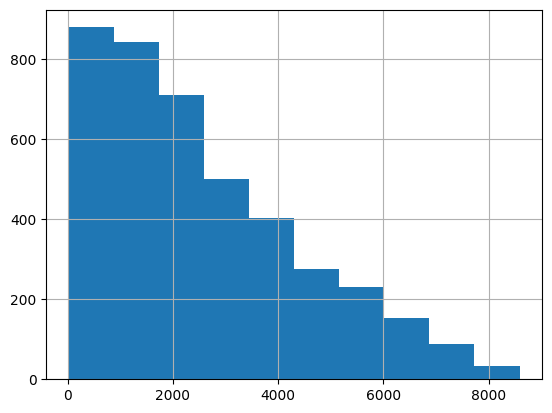

In [203]:
import matplotlib.pyplot as plt
y.hist()

In [204]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

object_cols = X.select_dtypes(include="object").columns
object_cols

for col in object_cols:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    encoders[col] = encoder
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,0,0,0,7,1,2,2,1,1,1,1,1,1,2,0,2
1,0,1,0,1,53,0,1,1,2,2,0,2,2,2,0,0,1
2,0,1,0,1,68,0,1,0,2,2,2,0,0,2,0,0,3
3,1,1,0,1,44,0,1,2,1,1,1,1,1,1,0,1,1
4,1,0,1,0,7,1,2,1,0,2,2,0,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1,1,0,1,4,0,1,0,2,0,2,0,2,0,1,0,0
1760,1,1,1,1,58,0,1,1,2,0,0,2,0,0,2,1,3
1761,0,1,1,1,50,1,0,2,1,1,1,1,1,1,0,0,3
1762,1,0,0,0,15,0,1,1,2,0,0,2,0,0,1,1,2


In [205]:
n_train = len(train)
train_X_df = X.iloc[:n_train]
test_X_df = X.iloc[n_train:]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_X_df, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_valid)

from sklearn.metrics import mean_absolute_error
score_rf = mean_absolute_error(y_valid, y_pred_rf)
score_rf


881.4131559101941

In [206]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(random_state=42)
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_valid)
score_lgbm = mean_absolute_error(y_valid, y_pred_lgbm)
score_lgbm

892.7058707931562

In [207]:
y_pred = model_rf.predict(test_X_df)
y_pred

array([3347.9269,  930.8059, 4431.8484, ..., 4523.4634, 1237.1883,
       3875.4532])

In [208]:
result = pd.DataFrame({
    "pred" : y_pred
})
result

,pred
0,3347.9269
1,930.8059
2,4431.8484
3,902.7815
4,1307.5545
...,...
1759,321.9643
1760,3946.8167
1761,4523.4634
1762,1237.1883


In [209]:
result.to_csv('result1.csv', index=False)

test= pd.read_csv('result1.csv')
test

,pred
0,3347.9269
1,930.8059
2,4431.8484
3,902.7815
4,1307.5545
...,...
1759,321.9643
1760,3946.8167
1761,4523.4634
1762,1237.1883


# 작업 3유형

## Q5. 주어진 데이터에서 로지스틱 회귀 분석을 수행해 유의확률(p-value)이 0.05 이상인 유의하지 않은 독립변수의 개수를 구하시오. (종속변수: Churn)

In [210]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,51,1,0,1.0,0,303.7,83,72.5,9.3,3.8
1,1,61,1,0,-0.2,2,194.8,89,66.3,10.9,13.3
2,0,84,1,1,-1.3,2,157.6,109,35.7,10.0,12.5
3,0,65,1,0,1.0,1,223.1,129,64.2,9.1,5.1
4,0,154,1,0,1.0,0,137.0,115,40.0,7.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...
995,0,32,1,0,0.6,1,241.2,94,64.1,8.5,13.4
996,0,24,0,0,-1.1,1,155.2,97,48.5,9.8,8.3
997,0,67,1,0,1.9,3,184.6,69,45.8,7.3,8.5
998,0,72,1,0,1.0,0,153.2,65,34.8,9.6,14.5


In [211]:
df.shape

(1000, 11)

In [212]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [213]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.13900,102.270000,0.89900,0.290000,0.819000,1.229000,175.66590,100.168000,56.626800,9.863500,10.205900
std,0.34612,39.252973,0.30148,0.453989,1.285874,1.228034,54.26558,20.804774,17.249066,2.568282,2.754986
min,0.00000,-34.000000,0.00000,0.000000,-3.500000,-3.000000,5.30000,10.000000,-0.100000,1.800000,1.600000
25%,0.00000,74.000000,1.00000,0.000000,0.000000,0.000000,139.70000,86.000000,44.875000,8.100000,8.275000
50%,0.00000,101.000000,1.00000,0.000000,0.900000,1.000000,175.95000,100.000000,56.550000,9.800000,10.300000
75%,0.00000,128.000000,1.00000,1.000000,1.700000,2.000000,213.45000,114.000000,68.300000,11.600000,12.100000
max,1.00000,234.000000,1.00000,1.000000,4.500000,5.000000,322.70000,172.000000,117.500000,18.000000,18.700000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            1000 non-null   int64  
 1   AccountWeeks     1000 non-null   int64  
 2   ContractRenewal  1000 non-null   int64  
 3   DataPlan         1000 non-null   int64  
 4   DataUsage        1000 non-null   float64
 5   CustServCalls    1000 non-null   int64  
 6   DayMins          1000 non-null   float64
 7   DayCalls         1000 non-null   int64  
 8   MonthlyCharge    1000 non-null   float64
 9   OverageFee       1000 non-null   float64
 10  RoamMins         1000 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 86.1 KB


In [215]:
df.nunique()

Churn                2
AccountWeeks       184
ContractRenewal      2
DataPlan             2
DataUsage           71
CustServCalls        9
DayMins            776
DayCalls           110
MonthlyCharge      524
OverageFee         134
RoamMins           139
dtype: int64

In [216]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [217]:
import statsmodels.api as sm

X = sm.add_constant(X)
model_lg = sm.Logit(y,X)
result = model_lg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.393603
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                 0.02367
Time:                        11:06:34   Log-Likelihood:                -393.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                   0.03924
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2146      0.913     -2.425      0.015      -4.005      -0.424
AccountWeeks        0.0026      0.002      1.114      0.265      -0.002       0.007
ContractRenewal     0.1603      0.325      0.493      0.622      -0.477       0.798
DataPlan            0.2874      0.198      1.454      0.146      -0.100       0.675
DataUsage          -0.1698      0.072     -2.343      0.019      -0.312      -0.028
CustServCalls       0.1374      0.074      1.858      0.063      -0.008       0.282
DayMins            -0.0036      0.002     -2.092      0.036      -0.007      -0.000
DayCalls            0.0023      0.004      0.526      0.599      -0.006       0.011
MonthlyCharge       0.0042      0.005      0.778      0.436      -0.006       0.015
OverageFee         -0.0127      0.036     -0.352      0.725      -0.084       0.058
RoamMins            0.0098      0.034      0.292      0.770      -0.056       0.076
===================================================================================
"""

In [218]:
result.pvalues

const              0.015322
AccountWeeks       0.265370
ContractRenewal    0.621969
DataPlan           0.145825
DataUsage          0.019118
CustServCalls      0.063182
DayMins            0.036410
DayCalls           0.598956
MonthlyCharge      0.436350
OverageFee         0.724826
RoamMins           0.770181
dtype: float64

In [219]:
len(result.pvalues[1:][result.pvalues[1:] > 0.05])

8

## Q6. 유의확률(p-value)이 0.05 미만인 유의한 변수만을 사용해 다시 로지스틱 회귀 분석을 수행하시오. 이 회귀식의 유의한 회귀 계수(상수항 포함)의 합계를 구하시오. (반올림하여 소수 셋째 자리까지 계산)

In [220]:
non_cols =  result.pvalues[1:][result.pvalues[1:] > 0.05].index.to_list()
X = X.drop(non_cols, axis=1)
X

,const,DataUsage,DayMins
0,1.0,1.0,303.7
1,1.0,-0.2,194.8
2,1.0,-1.3,157.6
3,1.0,1.0,223.1
4,1.0,1.0,137.0
...,...,...,...
995,1.0,0.6,241.2
996,1.0,-1.1,155.2
997,1.0,1.9,184.6
998,1.0,1.0,153.2


In [221]:
model_lg2 = sm.Logit(y, X)
result2 = model_lg2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.397599
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                 0.01375
Time:                        11:06:34   Log-Likelihood:                -397.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                  0.003908
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0395      0.303     -3.434      0.001      -1.633      -0.446
DataUsage     -0.1697      0.071     -2.376      0.017      -0.310      -0.030
DayMins       -0.0039      0.002     -2.264      0.024      -0.007      -0.001
==============================================================================
"""

In [222]:
result2.pvalues

const        0.000595
DataUsage    0.017491
DayMins      0.023548
dtype: float64

In [223]:
result2.pvalues[result2.pvalues < 0.05]

const        0.000595
DataUsage    0.017491
DayMins      0.023548
dtype: float64

In [227]:
round(result2.params.sum(),3)

-1.213

## Q7. 문제 1-2에서 수행한 로지스틱 회귀식에서 ‘DataUsage’ 변수가 5만큼 증가할 때 오즈비(Odds Ratio)를 구하시오. (반올림하여 소수 셋째 자리까지 계산)

In [261]:
result2.params[1]

C:\Users\yesol\AppData\Local\Temp\ipykernel_6920\2022160817.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result2.params[1]


-0.16973430212329096

In [262]:
import numpy as np

round(np.exp(5*result2.params[1]),3)

C:\Users\yesol\AppData\Local\Temp\ipykernel_6920\549482104.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(np.exp(5*result2.params[1]),3)


0.428

## Q8. 주어진 데이터를 이용해 종속변수(PIQ)와 독립변수(Brain, Height, Weight)로 다중 선형 회귀 분석을 수행 하시오. 이때 유의확률(p-value)이 가장 작은 변수의 회귀 계수 값을 구하시오. (반올림하여 소수 셋째 자리까지 계산)

In [232]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/piq.csv")
df.shape

(50, 4)

In [233]:
df.isna().sum()

PIQ       0
Brain     0
Height    0
Weight    0
dtype: int64

In [234]:
df.head()

,PIQ,Brain,Height,Weight
0,132,85.78,62.5,127
1,96,86.54,68.0,135
2,84,90.49,66.3,134
3,134,79.06,62.0,122
4,86,88.91,70.0,180


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PIQ     50 non-null     int64  
 1   Brain   50 non-null     float64
 2   Height  50 non-null     float64
 3   Weight  50 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [236]:
X = df.drop('PIQ',axis=1)
y = df['PIQ']

import statsmodels.api as sm
X = sm.add_constant(X)
model_lr = sm.OLS(y, X)
result_lr = model_lr.fit()
result_lr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     9.024
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           8.25e-05
Time:                        11:11:54   Log-Likelihood:                -217.27
No. Observations:                  50   AIC:                             442.5
Df Residuals:                      46   BIC:                             450.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.5114     50.564      1.474      0.147     -27.269     176.292
Brain          2.3431      0.456      5.141      0.000       1.426       3.261
Height        -2.6444      1.064     -2.485      0.017      -4.786      -0.503
Weight         0.0406      0.167      0.243      0.809      -0.296       0.377
==============================================================================
Omnibus:                        8.608   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.629
Skew:                           0.041   Prob(JB):                        0.269
Kurtosis:                       1.880   Cond. No.                     3.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
result_lr.pvalues.min()

5.467310306138599e-06

In [238]:
result_lr.pvalues.idxmin()

'Brain'

In [248]:
round(result_lr.params[1],3)


C:\Users\yesol\AppData\Local\Temp\ipykernel_6920\4293346011.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(result_lr.params[1],3)


2.343

## Q8. 문제 2-1에 적합한 모델의 결정 계수(R-squared) 값을 구하시오. (반올림하여 소수 둘째 자리까지 계산)

In [250]:
round(result_lr.rsquared,2)

0.37

## Q9. 뇌 크기(Brain)가 90, 키(Height)가 70, 몸무게(Weight)가 150일 때의 PIQ를 예측하시오. (반올림하여 정수로 계산)

In [273]:
X.columns

Index(['const', 'Brain', 'Height', 'Weight'], dtype='object')

In [281]:
X_test = pd.DataFrame( [[1,90,70,150]], columns=X.columns)
X_test

,const,Brain,Height,Weight
0,1,90,70,150


In [283]:
y_pred = result_lr.predict(X_test)
round(y_pred,0)

0    106.0
dtype: float64